In [1]:
import os
import keras

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test

x_train = x_train / 255.
x_test = x_test / 255.

# tranform RGB graph to single vector
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# do one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 78us/step - loss: 2.2920 - accuracy: 0.1421 - val_loss: 2.2463 - val_accuracy: 0.1791
Epoch 2/500
50000/50000 [==============================] - 3s 69us/step - loss: 2.2120 - accuracy: 0.2097 - val_loss: 2.1802 - val_accuracy: 0.2374
Epoch 3/500
50000/50000 [==============================] - 3s 69us/step - loss: 2.1516 - accuracy: 0.2469 - val_loss: 2.1245 - val_accuracy: 0.2606
Epoch 4/500
50000/50000 [==============================] - 3s 68us/step - loss: 2.1020 - accuracy: 0.2698 - val_loss: 2.0794 - val_accuracy: 0.2778
Epoch 5/500
50000/50000 [==============================] - 4s 71us/step - loss: 2.0614 - accuracy: 0.2881 - val_loss: 2.0420 - val_accuracy: 0.2988
Epoch 6/500
50000/50000 [==============================] - 4s 71us/step - loss: 2.0269 - accuracy: 0.3012 - val_loss: 2.0102 - val_accuracy: 0.3020
Epoch 7/500
50000/50000 [==============================] - 4s

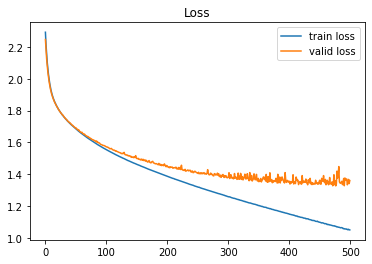

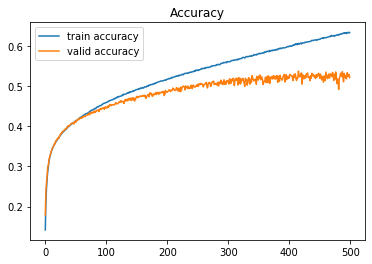

In [8]:
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()